In [4]:
pip install -i https://test.pypi.org/simple/ symdr==0.0.2

Looking in indexes: https://test.pypi.org/simple/
  Attempting uninstall: symdr
    Found existing installation: symdr 1.0.0
    Uninstalling symdr-1.0.0:
      Successfully uninstalled symdr-1.0.0


In [5]:
from sympy import *
import sympy as sp
from symdr import *
from symdr import Derivative as D
import numpy as np
init_printing()
import matplotlib.pyplot as plt

In [6]:
x, t = symbols("x t")
k, w = symbols("k w")
rho_d = Function("r_d")(x,t)
rho_g = Function("r_g")(x,t)
phi = Function("F")(x,t)
u_d = Function("u_d")(x,t)
u_g = Function("u_g")(x,t)
G, epsilon, t1, c = symbols("G e {t}_{stop} {c}_{s}")
u_gg, u_dd = symbols("{u}_{g}^{0} {u}_{d}^{0}")
rho_gg, rho_dd = symbols("{r}_{g}^{0} {r}_{d}^{0}")
system = [ D(rho_g, t, 1) + u_gg * D(rho_g, x, 1) + rho_gg * D(u_g,x,1),
          rho_gg * D(u_g,t,1) + rho_gg * u_gg * D(u_g,x,1) +c**2 * D(rho_g,x,1) - rho_gg * epsilon*(u_d-u_g)/(t1)+ rho_gg * D(phi,x,1),
          D(rho_d,t,1)+u_dd * D(rho_d,x,1) + rho_dd * D(u_d,x,1),
          D(u_d,t,1) + u_dd * D(u_d,x,1) - (u_g-u_d)/t1 + D(phi,x,1),
          D(phi,x,2) - G*(rho_g + rho_d) ]
system

⎡                                                                                                  ↪
⎢             ∂                            ∂               ∂                e⋅{r}_{g}__{0}⋅(u_d(x, ↪
⎢{r}_{g}__{0}⋅──(u_g(x, t)) + {u}_{g}__{0}⋅──(r_g(x, t)) + ──(r_g(x, t)), - ────────────────────── ↪
⎢             ∂x                           ∂x              ∂t                             {t}_{sto ↪
⎣                                                                                                  ↪

↪                                                                                                  ↪
↪  t) - u_g(x, t))          2 ∂                                         ∂                          ↪
↪ ──────────────── + {c}_{s} ⋅──(r_g(x, t)) + {r}_{g}__{0}⋅{u}_{g}__{0}⋅──(u_g(x, t)) + {r}_{g}__{ ↪
↪ p}                          ∂x                                        ∂x                         ↪
↪                                                                                         

In [7]:
# Matrix form
res = system_dr(system)[1]
res

⎡ⅈ⋅k⋅{u}_{g}__{0} - ⅈ⋅ω                          ⅈ⋅k⋅{r}_{g}__{0}                                  ↪
⎢                                                                                                  ↪
⎢                2       e⋅{r}_{g}__{0}                                                            ↪
⎢     ⅈ⋅k⋅{c}_{s}        ────────────── + ⅈ⋅k⋅{r}_{g}__{0}⋅{u}_{g}__{0} - ⅈ⋅ω⋅{r}_{g}__{0}         ↪
⎢                          {t}_{stop}                                                              ↪
⎢                                                                                                  ↪
⎢          0                                             0                                  ⅈ⋅k⋅{u ↪
⎢                                                                                                  ↪
⎢                                                      -1                                          ↪
⎢          0                                        ──────────                             

In [8]:
# First case
res1 = res.subs([(u_dd, 0),(u_gg, 0), (G,0), (epsilon, 1), (t1,oo), (rho_gg,1)])
res1=simplify(det(res1))
res1

 2  2 ⎛ 2        2    2⎞
k ⋅ω ⋅⎝k ⋅{c}_{s}  - ω ⎠

In [9]:
# Second case
res2 = res.subs([(u_dd, 0),(u_gg, 0), (t1,oo)])
res2=simplify(det(res2))
res2

 2              ⎛   2        2                   2                   2                 2  2        ↪
k ⋅{r}_{g}__{0}⋅⎝G⋅k ⋅{c}_{s} ⋅{r}_{d}__{0} - G⋅ω ⋅{r}_{d}__{0} - G⋅ω ⋅{r}_{g}__{0} + k ⋅ω ⋅{c}_{s ↪

↪  2    4⎞
↪ }  - ω ⎠

In [10]:
# Second case (Jeans's)
res2a = res.subs([(u_dd, 0),(u_gg, 0), (t1,oo),(rho_dd,0)])
res2a=simplify(det(res2a))
res2a

 2  2              ⎛                   2        2    2⎞
k ⋅ω ⋅{r}_{g}__{0}⋅⎝-G⋅{r}_{g}__{0} + k ⋅{c}_{s}  - ω ⎠

In [11]:
# Third case (t_stop=0)
res2b = res.subs([(u_dd, 0),(u_gg, 0)])
res2b=simplify(det(res2b))
res2b = res2b*t1
res2b.subs(t1,0)

 2              ⎛                                                                                  ↪
k ⋅{r}_{g}__{0}⋅⎝-ⅈ⋅G⋅e⋅ω⋅{r}_{d}__{0} - ⅈ⋅G⋅e⋅ω⋅{r}_{g}__{0} - ⅈ⋅G⋅ω⋅{r}_{d}__{0} - ⅈ⋅G⋅ω⋅{r}_{g} ↪

↪              3      2          2      3⎞
↪ __{0} - ⅈ⋅e⋅ω  + ⅈ⋅k ⋅ω⋅{c}_{s}  - ⅈ⋅ω ⎠

In [12]:
# Third case (General)
res3 = res.subs([(u_dd, 0),(u_gg, 0)])
res3=simplify(det(res3))
res3

 2              ⎛                                                  2        2                      ↪
k ⋅{r}_{g}__{0}⋅⎝-ⅈ⋅G⋅e⋅ω⋅{r}_{d}__{0} - ⅈ⋅G⋅e⋅ω⋅{r}_{g}__{0} + G⋅k ⋅{c}_{s} ⋅{r}_{d}__{0}⋅{t}_{st ↪
────────────────────────────────────────────────────────────────────────────────────────────────── ↪
                                                                                                   ↪

↪          2                              2                                                        ↪
↪ op} - G⋅ω ⋅{r}_{d}__{0}⋅{t}_{stop} - G⋅ω ⋅{r}_{g}__{0}⋅{t}_{stop} - ⅈ⋅G⋅ω⋅{r}_{d}__{0} - ⅈ⋅G⋅ω⋅{ ↪
↪ ──────────────────────────────────────────────────────────────────────────────────────────────── ↪
↪                                        {t}_{stop}                                                ↪

↪                    3    2  2        2                 2          2    4                 3⎞
↪ r}_{g}__{0} - ⅈ⋅e⋅ω  + k ⋅ω ⋅{c}_{s} ⋅{t}_{stop} + ⅈ⋅k ⋅ω⋅{c}_{s}  - ω ⋅{t}_{stop} - ⅈ⋅ω ⎠
↪ ──

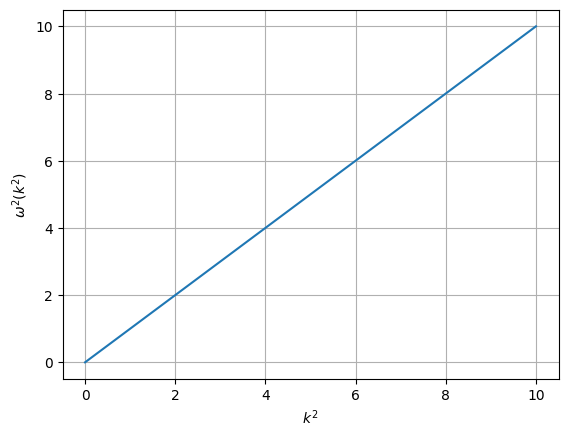

In [13]:
# Plot first case
k=np.linspace(0,10,50)
w=k
plt.plot(k,w)
plt.xlabel('$k^2$')
plt.ylabel('$\omega^2(k^2)$')
plt.grid()

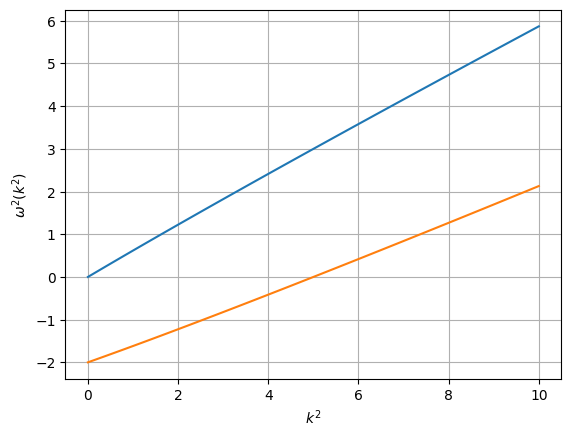

In [14]:
# Plot second case
w1=1/2*(k-2+np.sqrt(4+k))
w2=1/2*(k-2-np.sqrt(4+k))
plt.plot(k,w1)
plt.plot(k,w2)
plt.xlabel('$k^2$')
plt.ylabel('$\omega^2(k^2)$')
plt.grid()

In [15]:
#Plot third case
k, w = symbols("k w")
rho_d = Function("eq")(k,w)
eq = -k**2 * w**2 - I * k**2 * w - k**2 + w**4 + 2 * I * w**3 + 2 * w**2 + 4 * I * w
arr=[nroots(eq.subs(k,i/10)) for i in range(100)]
k=np.linspace(0,10,100)

In [16]:
ak0=[im(arr[i][0]) for i in range(100)]
ak1=[im(arr[i][1]) for i in range(100)]
ak2=[im(arr[i][2]) for i in range(100)]
ak3=[im(arr[i][3]) for i in range(100)]

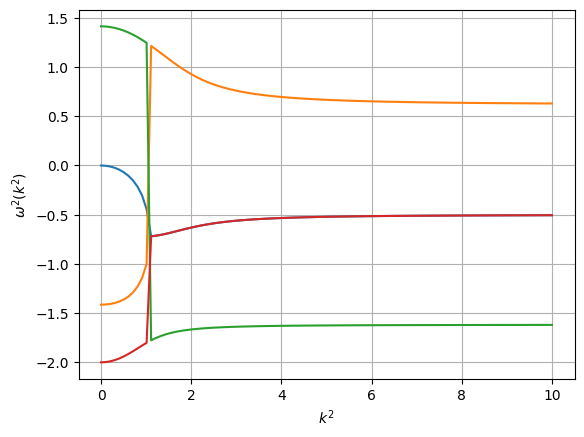

In [17]:
plt.plot(k,ak0)
plt.plot(k,ak1)
plt.plot(k,ak2)
plt.plot(k,ak3)
plt.xlabel('$k^2$')
plt.ylabel('$\omega^2(k^2)$')
plt.grid()